# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd 
import numpy as np

In [2]:
twitter_archive_df= pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive_df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [4]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image-predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import json
df =[]
with open('tweet-json.txt')as file:
    for i in file:
        df.append(json.loads(i))               

In [6]:
retweet_fav_count = pd.DataFrame(df, columns=['id','retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Dataframe 1

In [7]:
#read the first dataframe
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The twitter_archive_df dataframe has 17 columns and 2356 rows

In [9]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#check for duplicates
sum(twitter_archive_df.duplicated())

0

There are no duplicates in twitter_archive_df 

In [11]:
#create copy
twitter_archive_copy= twitter_archive_df.copy()

#### Dataframe 2

In [12]:
#read the dataframe into the notebook
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The image_pred dataframe has a total of 12 columns and 2075 rows

In [14]:
#rename the tweet_id column
image_pred.rename(columns = {'tweet_id':'tweetid'}, inplace = True)

In [15]:
image_pred.describe()

,tweetid,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
# check for duplicates
sum(image_pred.duplicated())

0

There are no duplicates in the image_pred dataframe

In [17]:
# create a copy of the image_pred dataframe
image_pred_copy = image_pred.copy()

#### Dataframe 3

In [18]:
#read the dataframe
retweet_fav_count.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [19]:
retweet_fav_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


The retweet_fav_count dataframe has a total of 3 columns and 2354 rows

In [20]:
retweet_fav_count.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [21]:
sum(retweet_fav_count.duplicated())

0

There are no duplicates in the dataframe

In [22]:
# create a copy of the dataframe
retweet_fav_count_copy = retweet_fav_count.copy()

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Tidiness issues
1. Merging the three dataframes into one
2. Join "doggo", "floofer", "pupper", "puppo" columns into one

### Issue #1: Merging the three dataframes into one

#### Define

Join the three dataframes into one

#### Code

In [23]:
# join the three dataframes into one for easy access
joined_df = pd.concat([twitter_archive_copy,image_pred_copy,retweet_fav_count_copy], axis=1)

#### Test

In [24]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue#2: Join "doggo", "floofer", "pupper", "puppo" columns into one

####  Define

Join "doggo", "floofer", "pupper", "puppo" columns into one 'dog_stage'

#### Code

In [25]:
joined_df.doggo.replace('None', '', inplace=True)
joined_df.floofer.replace('None', '', inplace=True)
joined_df.pupper.replace('None', '', inplace=True)
joined_df.puppo.replace('None', '', inplace=True)

# merge into column
joined_df['dog_stage'] = joined_df.doggo + joined_df.floofer + joined_df.pupper + joined_df.puppo

# handle multiple stages
joined_df.loc[joined_df.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
joined_df.loc[joined_df.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
joined_df.loc[joined_df.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
joined_df.loc[joined_df.dog_stage == '', 'dog_stage'] = np.nan

#### Test

In [26]:
joined_df['dog_stage'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [27]:
print(joined_df.columns)
print(joined_df.info())

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweetid', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweet_count',
       'favorite_count', 'dog_stage'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      

### Quality issues
1. Irrelevant columns: dropping irrelevant columns because they are not needed
2. removing retweet rows that have non-empty
3. Drop retweet columns
4. Correct columns with wrong data types 
5. invalid data: name column has invalid dog names
6. source column needs to be cleaned to make data clearer
7. some data in rating were not extracted correctly and datatype issue
8. Missing values: drop columns with nan values


### Issue #1: Irrelevant columns: dropping irrelevant columns because they are not needed


#### Define


i need to drop columns that are not going to be needed in my analysis.

#### Code

In [28]:
# dropping irrelevant columns
joined_df.drop(['in_reply_to_status_id','in_reply_to_user_id','tweetid',
                     'expanded_urls','p1_conf','p1_dog','p2_conf','p2_dog',
                     'p3_conf','p3_dog','doggo','floofer','pupper','puppo','id'], axis = 1, inplace = True)

#### Test 

In [29]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   rating_numerator            2356 non-null   int64  
 8   rating_denominator          2356 non-null   int64  
 9   name                        2356 non-null   object 
 10  jpg_url                     2075 non-null   object 
 11  img_num                     2075 non-null   float64
 12  p1                          2075 non-null   object 
 13  p2                          2075 

### Issue #2: removing retweet rows that have non-empty rows

#### Define

The project asked for only analysation of original tweets so i'm dropping retweet columns

#### Code

In [30]:
# removing retweet rows that have non-empty
joined_df = joined_df[joined_df.retweeted_status_id.isnull()]
joined_df = joined_df[joined_df.retweeted_status_user_id.isnull()]
joined_df = joined_df[joined_df.retweeted_status_timestamp.isnull()]

#### Test

In [31]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   timestamp                   2175 non-null   object 
 2   source                      2175 non-null   object 
 3   text                        2175 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      object 
 7   rating_numerator            2175 non-null   int64  
 8   rating_denominator          2175 non-null   int64  
 9   name                        2175 non-null   object 
 10  jpg_url                     1896 non-null   object 
 11  img_num                     1896 non-null   float64
 12  p1                          1896 non-null   object 
 13  p2                          1896 

This removed the retweet tweetids from the tweet_id column

### Issue #3: Dropping retweet columns

In [32]:
#dropping empty retweet columns
joined_df.drop(['retweeted_status_id','retweeted_status_user_id',
                'retweeted_status_timestamp'], axis = 1, inplace = True)

In [33]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   rating_numerator    2175 non-null   int64  
 5   rating_denominator  2175 non-null   int64  
 6   name                2175 non-null   object 
 7   jpg_url             1896 non-null   object 
 8   img_num             1896 non-null   float64
 9   p1                  1896 non-null   object 
 10  p2                  1896 non-null   object 
 11  p3                  1896 non-null   object 
 12  retweet_count       2173 non-null   float64
 13  favorite_count      2173 non-null   float64
 14  dog_stage           344 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 271.9+

### issue #4: some columns have wrong data types

#### Define

correct the datatype of the columns that have wrong datatypes eg timestamp

#### code

In [34]:
joined_df['timestamp'] = pd.to_datetime(joined_df['timestamp'])
joined_df['tweet_id'] = joined_df['tweet_id'].astype(str)

#### Test

In [35]:
print(joined_df.timestamp.dtype)
print(joined_df.tweet_id.dtype)

datetime64[ns, UTC]
object


### issue #5: invalid data: name column has invalid dog names

#### Define

name column has some invalid dog names like a,an,my,just,by etc. names always have their first character to be upper case. so the strings in lower case are all invalid

#### Code

In [36]:
joined_df['name'][joined_df['name'].str.match('[a-z]')]='None'

C:\Users\admin\AppData\Local\Temp/ipykernel_15828/2759125899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['name'][joined_df['name'].str.match('[a-z]')]='None'


#### Test

In [37]:
joined_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [38]:
joined_df.loc[joined_df.name == 'a']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p2,p3,retweet_count,favorite_count,dog_stage


### issue #6: source column needs to be cleaned to make data clearer

#### Define

i will extract the source from which the tweet was tweeted, either iphone, tweet deck etc

#### Code

In [39]:
joined_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [40]:
joined_df['source'] = joined_df['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [41]:
joined_df.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### issue #7: some data in rating were not extracted correctly and datatype issue

#### Define

Extract the wrong data correctly and fix the datatype issue

#### Code

In [42]:
rating = joined_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [43]:
joined_df['rating_numerator'] = joined_df['rating_numerator'].astype(float)
joined_df['rating_denominator'] = joined_df['rating_denominator'].astype(float)

#### Test

In [44]:
print(joined_df.rating_numerator.dtype)
print(joined_df.rating_denominator.dtype)

float64
float64


### issue #8: Missing values

#### Define

dropping columns with nan values

#### Code

In [45]:
joined_df.dropna(inplace = True)

#### Test

In [46]:
joined_df.isnull().any()

tweet_id              False
timestamp             False
source                False
text                  False
rating_numerator      False
rating_denominator    False
name                  False
jpg_url               False
img_num               False
p1                    False
p2                    False
p3                    False
retweet_count         False
favorite_count        False
dog_stage             False
dtype: bool

In [47]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 9 to 2017
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            344 non-null    object             
 1   timestamp           344 non-null    datetime64[ns, UTC]
 2   source              344 non-null    object             
 3   text                344 non-null    object             
 4   rating_numerator    344 non-null    float64            
 5   rating_denominator  344 non-null    float64            
 6   name                344 non-null    object             
 7   jpg_url             344 non-null    object             
 8   img_num             344 non-null    float64            
 9   p1                  344 non-null    object             
 10  p2                  344 non-null    object             
 11  p3                  344 non-null    object             
 12  retweet_count       344 non-null   

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
joined_df.to_csv("twitter_archive_master.csv")

In [49]:
df = pd.read_csv("twitter_archive_master.csv")

In [50]:
df

,Unnamed: 0,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p2,p3,retweet_count,favorite_count,dog_stage
0,9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1.0,miniature_poodle,komondor,soft-coated_wheaten_terrier,7711.0,32467.0,doggo
1,12,889665388333682689,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,13.0,10.0,None,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1.0,Walker_hound,English_foxhound,Ibizan_hound,8538.0,38818.0,puppo
2,14,889531135344209921,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg,1.0,bloodhound,German_shepherd,malinois,2321.0,15359.0,puppo
3,29,886366144734445568,2017-07-15 23:25:31+00:00,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1.0,coho,barracouta,gar,4.0,117.0,pupper
4,43,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12.0,10.0,Yogi,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1.0,seat_belt,miniature_pinscher,Chihuahua,3586.0,22349.0,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,1995,672594978741354496,2015-12-04 01:55:13+00:00,Twitter for iPhone,Meet Scott. Just trying to catch his train to ...,9.0,10.0,Scott,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1.0,cocker_spaniel,miniature_poodle,toy_poodle,207.0,782.0,pupper
340,2002,672481316919734272,2015-12-03 18:23:34+00:00,Twitter for iPhone,Say hello to Jazz. She should be on the cover ...,12.0,10.0,Jazz,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1.0,bloodhound,redbone,Tibetan_mastiff,598.0,1447.0,pupper
341,2009,672254177670729728,2015-12-03 03:21:00+00:00,Twitter for iPhone,This is Rolf. He's having the time of his life...,11.0,10.0,Rolf,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1.0,basset,collie,Appenzeller,169.0,733.0,pupper
342,2015,672205392827572224,2015-12-03 00:07:09+00:00,Twitter for iPhone,This is Opal. He's a Royal John Coctostan. Rea...,9.0,10.0,Opal,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1.0,German_short-haired_pointer,vizsla,bath_towel,395.0,918.0,pupper


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Analyzing

#### Which tweet_source was the most used?

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
joined_df.source.value_counts()

Twitter for iPhone     314
Vine - Make a Scene     26
Twitter Web Client       2
TweetDeck                2
Name: source, dtype: int64

In [53]:
source = ['Twitter for iPhone', 'Vine-Make a Scene', 'Twitter Web Client', 'TweetDeck']
value_counts = [314,26,2,2]

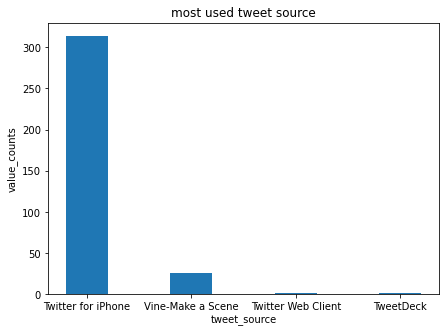

In [54]:
fig = plt.figure(figsize= (7,5))
plt.bar(source,value_counts, width = 0.4)
plt.xlabel("tweet_source")
plt.ylabel("value_counts")
plt.title("most used tweet source")
plt.show()

From the bar chart, with the value count of 314, twitter for iphone was the most used source by a large gap. followed by vine-make a scene and the least being twitter web client and tweetdeck with the count of 2 each.

#### which dog breed is most popular ?

In [55]:
joined_df.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [56]:
dog_stage = ['pupper','doggo','puppo','doggo,pupper','floofer','doggo,puppo','doggo,floofer']
values = [244,75,24,10,9,1,1]

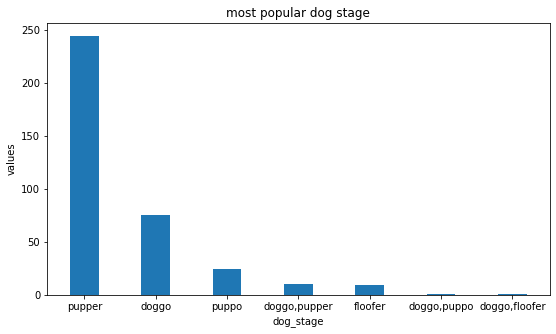

In [57]:
fig = plt.figure(figsize= (9,5))
plt.bar(dog_stage,values, width = 0.4)
plt.xlabel("dog_stage")
plt.ylabel("values")
plt.title("most popular dog stage")
plt.show()

The most popular dog stage is pupper with 244 counts and the least is 'doggo,puppo' and 'doggo,floofer' with count of 1 each.

#### Which is the most popular dog name?

In [58]:
joined_df.name.value_counts()

None      160
Cooper      3
Milo        2
Gus         2
Loki        2
         ... 
Combo       1
Sophie      1
Huck        1
Anakin      1
Bubba       1
Name: name, Length: 174, dtype: int64

In [59]:
dog_names = ['Cooper','Milo','Gus','Loki',]
counts = [3, 2, 2, 2]

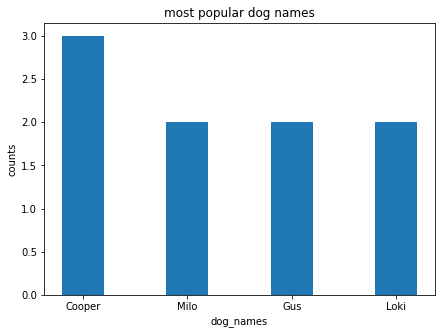

In [60]:
fig = plt.figure(figsize= (7,5))
plt.bar(dog_names,counts, width = 0.4)
plt.xlabel("dog_names")
plt.ylabel("counts")
plt.title("most popular dog names")
plt.show()

Cooper is the most popular dog name with a count of 3 and the least are Milo, Gus and Loki with counts of 2 each

#### Correlation between retweet_count and favorite_count

In [61]:
x = joined_df.retweet_count
y = joined_df.favorite_count

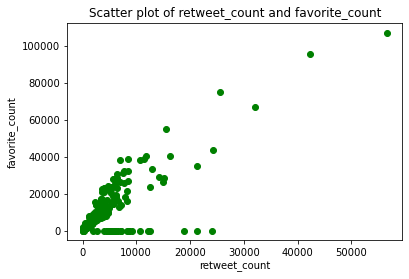

In [62]:
plt.plot(x,y,'go')
plt.title('Scatter plot of retweet_count and favorite_count')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show()

From the scatter plot,there is a positive correlation between retweet_count and favourite_count. This can be interpreted to mean that the more people like a tweet, the more retweets it gets. As one increases, so does the other.